In [37]:
#Phase 0: Set up
import pandas as pd
import numpy as np


In [38]:
#Phase 1: Load Data

hr = pd.read_csv('../data/heart_rate_6users_1year_persona_fixed_dates.csv')

steps = pd.read_csv('../data/steps_6users_1year_persona_fixed_dates.csv')

print("Heart rate shape:", hr.shape)
print("steps shape:", steps.head())

Heart rate shape: (2190, 11)
steps shape:    sdv_user_id calendar_date  start_time_in_seconds  duration_in_seconds  \
0         8101    2025-01-01             1735689600                86400   
1         8101    2025-02-01             1735776000                86400   
2         8101    2025-03-01             1735862400                86400   
3         8101    2025-04-01             1735948800                86400   
4         8101    2025-05-01             1736035200                86400   

   steps  steps_goal  end_time_in_seconds   start_date_time     end_date_time  \
0   9245       10000           1735776000  01/01/2025 00:00  01/02/2025 00:00   
1  19145       15000           1735862400  01/02/2025 00:00  01/03/2025 00:00   
2  11281       12000           1735948800  01/03/2025 00:00  01/04/2025 00:00   
3  12143       12000           1736035200  01/04/2025 00:00  01/05/2025 00:00   
4  13651       15000           1736121600  01/05/2025 00:00  01/06/2025 00:00   

   week_nr  we

In [39]:
#: Convert Date + Merge
hr["calendar_date"]    = pd.to_datetime(hr["calendar_date"])

steps["calendar_date"] = pd.to_datetime(steps["calendar_date"])

#merge user and date
data = pd.merge(hr, steps[["sdv_user_id", "calendar_date", "steps", "steps_goal"]], on=["sdv_user_id", "calendar_date"],
how="inner")

print("merged data shape:", data.shape)
data.head()

merged data shape: (2190, 13)


,sdv_user_id,calendar_date,start_time_in_seconds,duration_in_seconds,average_stress_level,resting_heart_rate_in_beats_per_minute,end_time_in_seconds,start_date_time,end_date_time,week_nr,weekday,steps,steps_goal
0,8101,2025-01-01,1735689600,86400,26,59,1735776000,01/01/2025 00:00,01/02/2025 00:00,1,2,9245,10000
1,8101,2025-02-01,1735776000,86400,37,59,1735862400,01/02/2025 00:00,01/03/2025 00:00,1,3,19145,15000
2,8101,2025-03-01,1735862400,86400,30,58,1735948800,01/03/2025 00:00,01/04/2025 00:00,1,4,11281,12000
3,8101,2025-04-01,1735948800,86400,32,57,1736035200,01/04/2025 00:00,01/05/2025 00:00,1,5,12143,12000
4,8101,2025-05-01,1736035200,86400,25,57,1736121600,01/05/2025 00:00,01/06/2025 00:00,1,6,13651,15000


In [40]:
#info + describe
print(data.info())
data.describe()[[
    "average_stress_level",
    "resting_heart_rate_in_beats_per_minute",
    "steps",
    "steps_goal"
]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   sdv_user_id                             2190 non-null   int64         
 1   calendar_date                           2190 non-null   datetime64[ns]
 2   start_time_in_seconds                   2190 non-null   int64         
 3   duration_in_seconds                     2190 non-null   int64         
 4   average_stress_level                    2190 non-null   int64         
 5   resting_heart_rate_in_beats_per_minute  2190 non-null   int64         
 6   end_time_in_seconds                     2190 non-null   int64         
 7   start_date_time                         2190 non-null   object        
 8   end_date_time                           2190 non-null   object        
 9   week_nr                                 2190 non-nul

,average_stress_level,resting_heart_rate_in_beats_per_minute,steps,steps_goal
count,2190.000000,2190.000000,2190.000000,2190.000000
mean,33.305479,66.431507,8464.137900,9178.538813
min,5.000000,50.000000,0.000000,4000.000000
25%,24.000000,59.000000,4154.500000,8000.000000
50%,31.000000,65.000000,8291.500000,10000.000000
75%,40.000000,72.000000,11747.500000,10000.000000
max,93.000000,95.000000,26851.000000,15000.000000
std,12.744648,8.946040,4958.741729,3067.922376


In [41]:
#Phase 2: Explore Data visually
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\lehun\AppData\Local\Temp\ipykernel_13220\1986168879.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="sdv_user_id", y="steps", estimator=np.mean, ci=None)


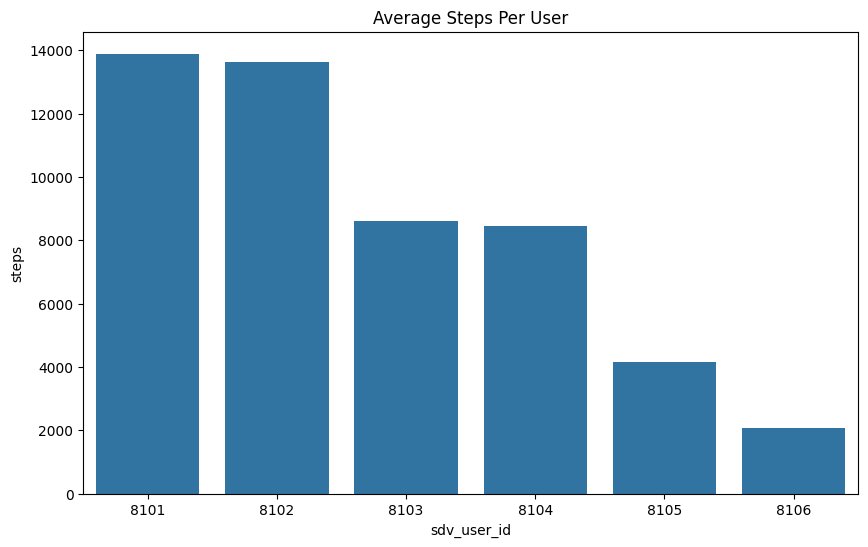

C:\Users\lehun\AppData\Local\Temp\ipykernel_13220\1986168879.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="sdv_user_id", y="average_stress_level", estimator = np.mean, ci=None)


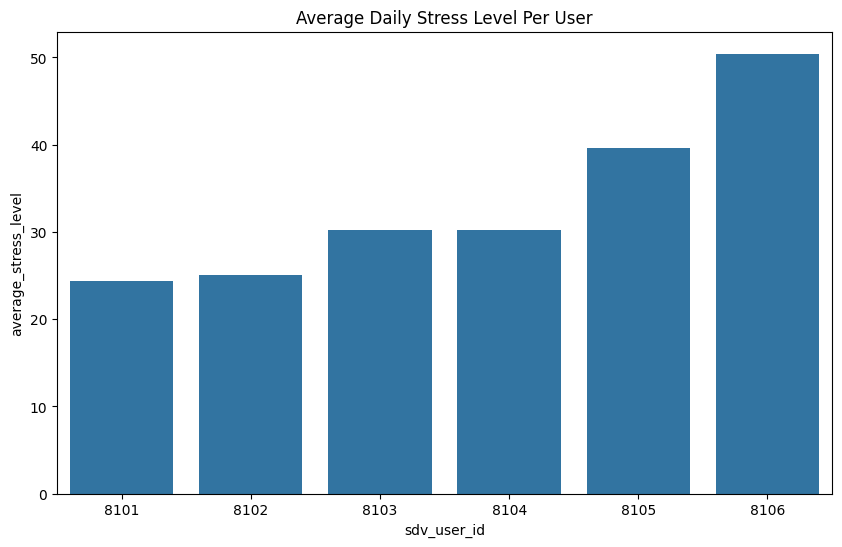

C:\Users\lehun\AppData\Local\Temp\ipykernel_13220\1986168879.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="sdv_user_id", y= "resting_heart_rate_in_beats_per_minute",estimator = np.mean, ci=None)


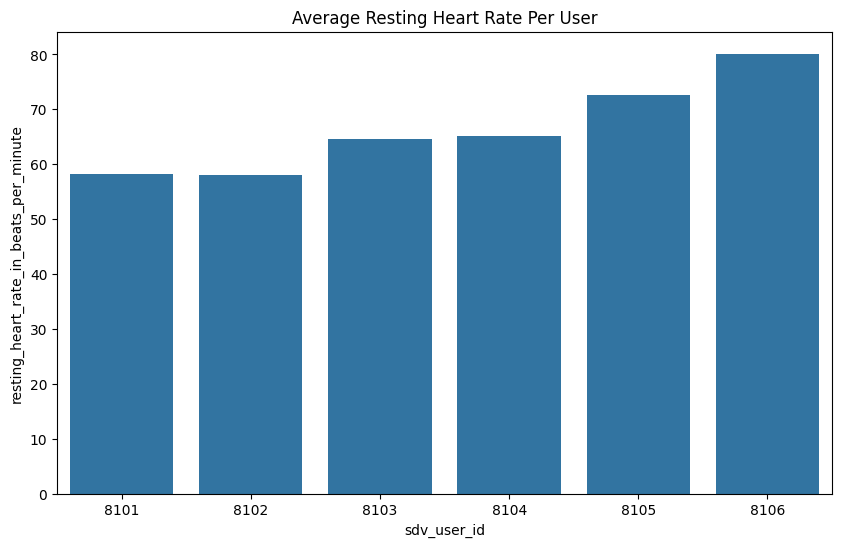

In [42]:
#Personas by steps and stress
plt.figure(figsize=(10,6))
sns.barplot(data=data, x="sdv_user_id", y="steps", estimator=np.mean, ci=None)
plt.title("Average Steps Per User")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=data, x="sdv_user_id", y="average_stress_level", estimator = np.mean, ci=None)
plt.title("Average Daily Stress Level Per User")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=data, x="sdv_user_id", y= "resting_heart_rate_in_beats_per_minute",estimator = np.mean, ci=None)   
plt.title("Average Resting Heart Rate Per User")
plt.show() 

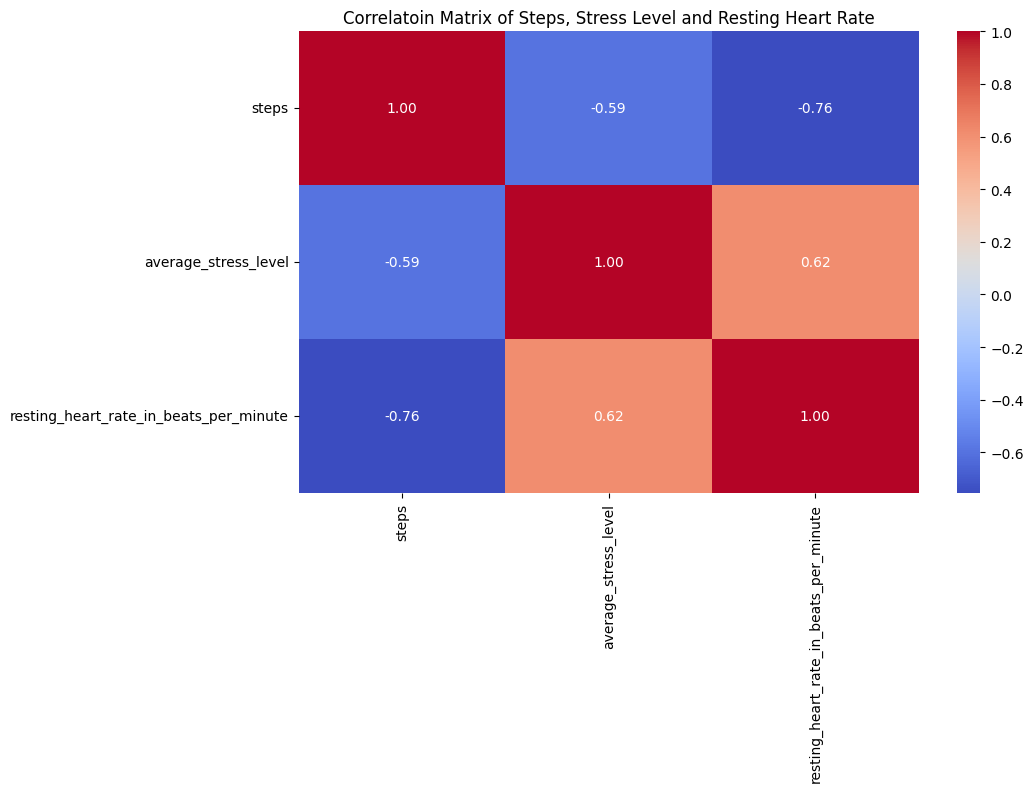

In [43]:
#Correlation between indicators
corr = data[["steps", "average_stress_level", "resting_heart_rate_in_beats_per_minute"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlatoin Matrix of Steps, Stress Level and Resting Heart Rate")
plt.show()

#We can see the the correlation between of 3 indicators is really high.

In [44]:
#Phase 3: Prepare Data For THe Model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Map Each User to a persona label
persona_map = {
    8101: "high_workout",
    8102 : "high_workout",
    8103 : "healthy",
    8104 : "healthy",
    8105 : "low_activity",
    8106 : "lazy_obese",
}

data['activity_label'] = data['sdv_user_id'].map(persona_map)
data['activity_label'].value_counts()

activity_label
high_workout    730
healthy         730
low_activity    365
lazy_obese      365
Name: count, dtype: int64

In [46]:
#Select 3 key indicators as features
feature_col = [
    "steps",
    "average_stress_level",
    "resting_heart_rate_in_beats_per_minute"
]

x = data[feature_col].copy()
y = data["activity_label"].copy()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

print("Class names:", class_names)
print("Encoded labels:", np.unique(y_encoded))


Class names: ['healthy' 'high_workout' 'lazy_obese' 'low_activity']
Encoded labels: [0 1 2 3]


In [47]:
#Split into  train and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x, y_encoded, test_size= 0.2, random_state=42, stratify=y_encoded
)

#standarlize input feature
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)

print("X train sclaed: ", x_trained_scaled[:5])
print("X val scaled: ", x_val_scaled[:5])


X train sclaed:  [[ 1.35977405 -0.65079891 -1.05638104]
 [-0.03178178 -0.89173708 -0.27229479]
 [-1.05255323  0.87514278  0.62380378]
 [ 0.55195036 -0.57048619  0.28776681]
 [-0.48887991 -0.89173708  0.06374217]]
X val scaled:  [[ 0.36569029  0.42610821  0.17384316]
 [ 0.06358229  0.0641311  -0.93611754]
 [-0.3110792   0.86048073 -0.82512147]
 [-0.11423324 -0.15305516 -0.15914505]
 [-0.21612531 -0.37024142 -0.04814898]]


In [48]:
#Phase 4: Build Neural Network in Pytorch
#Set up
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [49]:
#Covert Numpy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_trained_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

x_val_tensor = torch.tensor(x_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

#Dataset and DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("x_train_tensor", x_train_tensor)
print("y_train_tensor", y_train_tensor)
print("train_loader", train_loader)
print("val_loader", val_loader)
len(train_loader), len(val_loader)

x_train_tensor tensor([[ 1.3598, -0.6508, -1.0564],
        [-0.0318, -0.8917, -0.2723],
        [-1.0526,  0.8751,  0.6238],
        ...,
        [ 0.6113, -1.2130, -0.3843],
        [ 0.0256,  1.3570,  0.2878],
        [-1.2392,  0.6342,  1.1839]])
y_train_tensor tensor([1, 0, 3,  ..., 1, 0, 2])
train_loader <torch.utils.data.dataloader.DataLoader object at 0x0000021AF9942BC0>
val_loader <torch.utils.data.dataloader.DataLoader object at 0x0000021AF9941180>


(55, 14)

In [50]:
input_dim = x_train_tensor.shape[1] #should be 3
num_classes = len(class_names)      #4 personas

class ActivityNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ActivityNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)
        self.rulu2 = nn.ReLU()
        self.out = nn.Linear(8, num_classes)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.rulu2(self.fc2(x))
        x = self.out(x)
        return x

model = ActivityNet(input_dim, num_classes)
model

ActivityNet(
  (fc1): Linear(in_features=3, out_features=16, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (rulu2): ReLU()
  (out): Linear(in_features=8, out_features=4, bias=True)
)

In [51]:
#PHASE 5: Training Setup & Loop
#Device, Loss, Optimizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25


Using device: cuda


In [52]:
#Traning + Validation Loop
train_history = []
val_history   = []

for epoch in range(num_epochs):
    # ---------- TRAIN ----------
    model.train()
    total_train, correct_train, loss_train = 0, 0, 0.0
    
    for Xb, yb in train_loader:
        Xb = Xb.to(device)
        yb = yb.to(device)
        
        optimizer.zero_grad()
        outputs = model(Xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        
        loss_train += loss.item() * Xb.size(0)
        total_train += yb.size(0)
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == yb).sum().item()
    
    epoch_train_loss = loss_train / total_train
    epoch_train_acc  = correct_train / total_train
    
    # ---------- VALIDATION ----------
    model.eval()
    val_loss, val_total, val_correct = 0.0, 0, 0
    
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb = Xb.to(device)
            yb = yb.to(device)
            outputs = model(Xb)
            loss = criterion(outputs, yb)
            
            val_loss += loss.item() * Xb.size(0)
            val_total += yb.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == yb).sum().item()
    
    epoch_val_loss = val_loss / val_total
    epoch_val_acc  = val_correct / val_total
    
    train_history.append((epoch_train_loss, epoch_train_acc))
    val_history.append((epoch_val_loss, epoch_val_acc))
    
    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {epoch_train_loss:.4f}, Acc: {epoch_train_acc:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f}, Acc: {epoch_val_acc:.4f}")



Epoch 1/25 | Train Loss: 1.3606, Acc: 0.3037 | Val Loss: 1.2886, Acc: 0.5525
Epoch 2/25 | Train Loss: 1.2182, Acc: 0.5120 | Val Loss: 1.1201, Acc: 0.5160
Epoch 3/25 | Train Loss: 1.0384, Acc: 0.5143 | Val Loss: 0.9447, Acc: 0.5799
Epoch 4/25 | Train Loss: 0.8920, Acc: 0.5674 | Val Loss: 0.8140, Acc: 0.5845
Epoch 5/25 | Train Loss: 0.7582, Acc: 0.6159 | Val Loss: 0.6687, Acc: 0.7671
Epoch 6/25 | Train Loss: 0.6125, Acc: 0.7928 | Val Loss: 0.5337, Acc: 0.8037
Epoch 7/25 | Train Loss: 0.5020, Acc: 0.8191 | Val Loss: 0.4427, Acc: 0.8425
Epoch 8/25 | Train Loss: 0.4329, Acc: 0.8373 | Val Loss: 0.3900, Acc: 0.8699
Epoch 9/25 | Train Loss: 0.3901, Acc: 0.8562 | Val Loss: 0.3546, Acc: 0.8904
Epoch 10/25 | Train Loss: 0.3608, Acc: 0.8687 | Val Loss: 0.3294, Acc: 0.8927
Epoch 11/25 | Train Loss: 0.3412, Acc: 0.8710 | Val Loss: 0.3106, Acc: 0.8904
Epoch 12/25 | Train Loss: 0.3259, Acc: 0.8779 | Val Loss: 0.2984, Acc: 0.8950
Epoch 13/25 | Train Loss: 0.3135, Acc: 0.8767 | Val Loss: 0.2930, Acc: 0.

In [58]:
#Final Validation Accuracy

from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on validation set
model.eval()
y_val_pred = []

with torch.no_grad():
    for Xb, _ in val_loader:
        Xb = Xb.to(device)
        outputs = model(Xb)
        _, preds = torch.max(outputs, 1)
        y_val_pred.extend(preds.cpu().numpy())

val_acc = accuracy_score(y_val, y_val_pred)
print("Final validation accuracy:", val_acc)


Final validation accuracy: 0.908675799086758


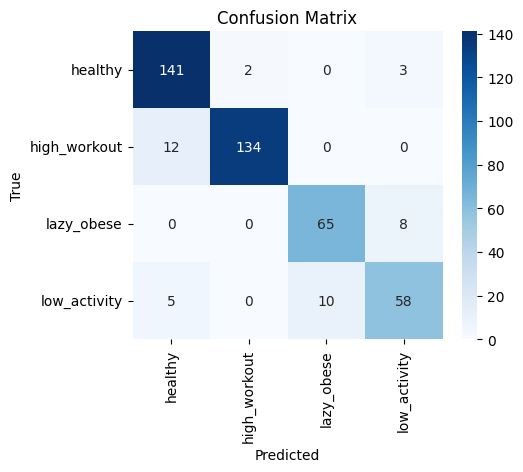

In [54]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_val, y_val_pred)

sns.heatmap(
    cm, annot=True, fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [59]:
#Predict activity fro one day 
def predict_activity_for_row(row, model, scaler, label_encoder, feature_cols, device):
    model.eval()
    
    # take features → (1, n_features)
    features = row[feature_cols].to_numpy().astype(np.float32).reshape(1, -1)
    
    # scale same as training
    features_scaled = scaler.transform(features)
    
    #  to tensor
    x_tensor = torch.tensor(features_scaled, dtype=torch.float32).to(device)
    
    with torch.no_grad():
        outputs = model(x_tensor)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        pred_idx = int(np.argmax(probs))
    
    pred_label = label_encoder.inverse_transform([pred_idx])[0]
    return pred_label, probs


In [60]:
#Generate feedback
def generate_feedback(row, predicted_label, probs):
    steps   = row["steps"]
    stress  = row["average_stress_level"]
    rest_hr = row["resting_heart_rate_in_beats_per_minute"]
    
    conf = float(np.max(probs)) * 100
    
    summary = (
        f"Today: {steps:.0f} steps, "
        f"stress level {stress:.1f}, "
        f"resting heart rate {rest_hr:.1f} bpm.\n\n"
    )
    
    if predicted_label == "high_workout":
        msg = (
            "You look like a highly active person. "
            "Your step count is high and your heart looks strong. "
            "Keep it up, but remember to give your body enough rest days."
        )
    elif predicted_label == "healthy":
        msg = (
            "You have a very balanced profile. "
            "Your movement, stress, and heart rate are all in a healthy range. "
            "Try to maintain this consistency across the week."
        )
    elif predicted_label == "low_activity":
        msg = (
            "Your stress and resting heart rate are okay, "
            "but your steps are a bit low today. "
            "A simple 10–15 minute walk could already make a big difference for your health."
        )
    else:  # lazy_obese
        msg = (
            "Your activity is quite low and your resting heart rate is on the higher side. "
            "Don't worry, you don't need to change everything at once. "
            "Start with small goals like adding 1500–2000 steps per day, "
            "and gradually build up. Small habits create big results over time 💙."
        )
    
    conf_line = f"\n\nModel confidence for '{predicted_label}': {conf:.1f}%."
    
    return summary + msg + conf_line


In [ ]:
#Test AI model
sample_row = data.sample(1, random_state=42).iloc[0]

pred_label, probs = predict_activity_for_row(
    sample_row, model, scaler, label_encoder, feature_col, device
)

print("True label     :", sample_row["activity_label"])
print("Predicted label:", pred_label)
print("\n--- FEEDBACK ---\n")
print(generate_feedback(sample_row, pred_label, probs))


True label     : high_workout
Predicted label: high_workout

--- FEEDBACK ---

Today: 12338 steps, stress level 24.0, resting heart rate 62.0 bpm.

You look like a highly active person. Your step count is high and your heart looks strong. Keep it up, but remember to give your body enough rest days.

Model confidence for 'high_workout': 80.6%.


c:\INHOLLAND UNIVERSITY\Internship Third Year\Project\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


: 